In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Loading the california Data


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/caliofornia_housing/housing.csv')

In [4]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

#Missing Data Analysis

In [6]:
missing_values = data.isnull().sum()

missing_percent = (missing_values/len(data))*100
print("missing values \n",missing_values)
print("missing % \n",missing_percent)

missing values 
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
missing % 
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


### Dropping the null values instances

In [7]:
data_cleaned = data.dropna()
data_cleaned.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


#Data Visualiaztion in Histogram

In [8]:
data_cleaned.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


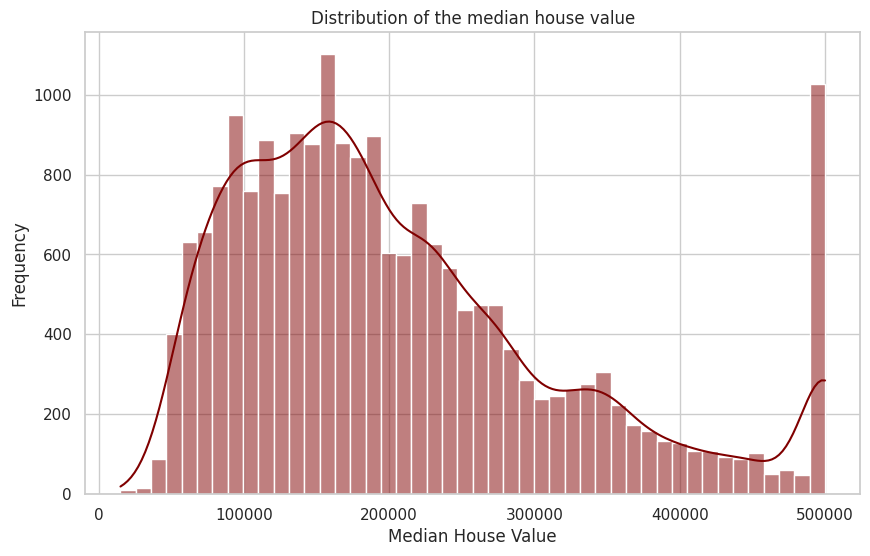

In [9]:
sb.set(style="whitegrid")
plt.figure(figsize=(10,6))
sb.histplot(data_cleaned['median_house_value'], color='maroon', kde=True)
plt.title('Distribution of the median house value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Count how many times each median house value occurs
data['median_house_value'].value_counts()


,count
median_house_value,
500001.0,965
137500.0,122
162500.0,117
112500.0,103
187500.0,93
...,...
34200.0,1
46200.0,1
352000.0,1


###Inter Quantile Range for Outliers Detection

In [11]:
from functools import update_wrapper
Q1 = data_cleaned['median_house_value'].quantile(0.25)
print(Q1)
Q3 = data_cleaned['median_house_value'].quantile(0.75)
print(Q3)

lower_bound = Q1 - 1.5 * (Q3 - Q1)
upper_bound = Q3 + 1.5 * (Q3 - Q1)

# remove outliers
data_no_outliers_1 = data_cleaned[(data_cleaned['median_house_value'] >= lower_bound) & (data_cleaned['median_house_value'] <= upper_bound)  ]

print('old',data_cleaned.shape)
print("new",data_no_outliers_1.shape)

119500.0
264700.0
old (20433, 10)
new (19369, 10)


##Box plot for outliers dection

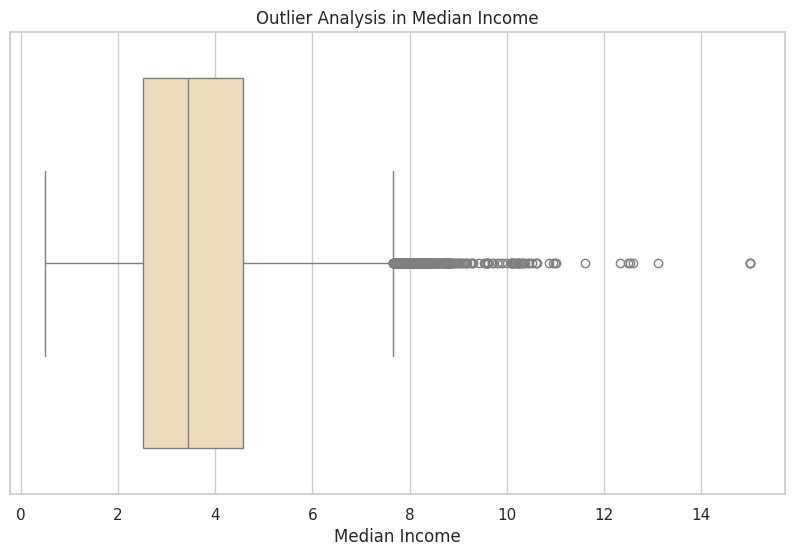

In [12]:
plt.figure(figsize=(10, 6))
sb.boxplot(x=data_no_outliers_1['median_income'], color='wheat')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

In [13]:
# Calculate Q1 and Q3
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]

# Check the shape of the data before and after the removal of outliers
print("Original data shape:", data_no_outliers_1.shape)
print("Data shape without outliers:", data_no_outliers_2.shape)

Original data shape: (19369, 10)
Data shape without outliers: (19026, 10)


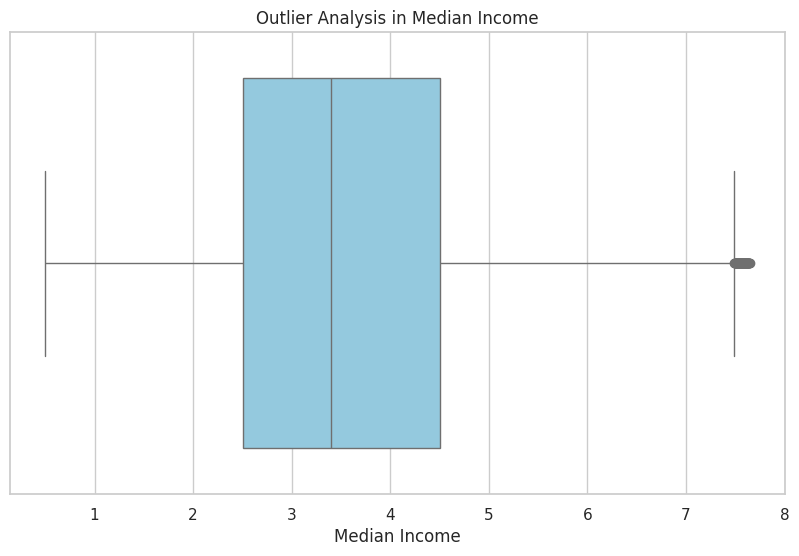

In [14]:
plt.figure(figsize=(10, 6))
sb.boxplot(x=data_no_outliers_2['median_income'], color='skyblue')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

# here we can see that outliers are reduced

In [15]:
data = data_no_outliers_2

##Corelation Heat map

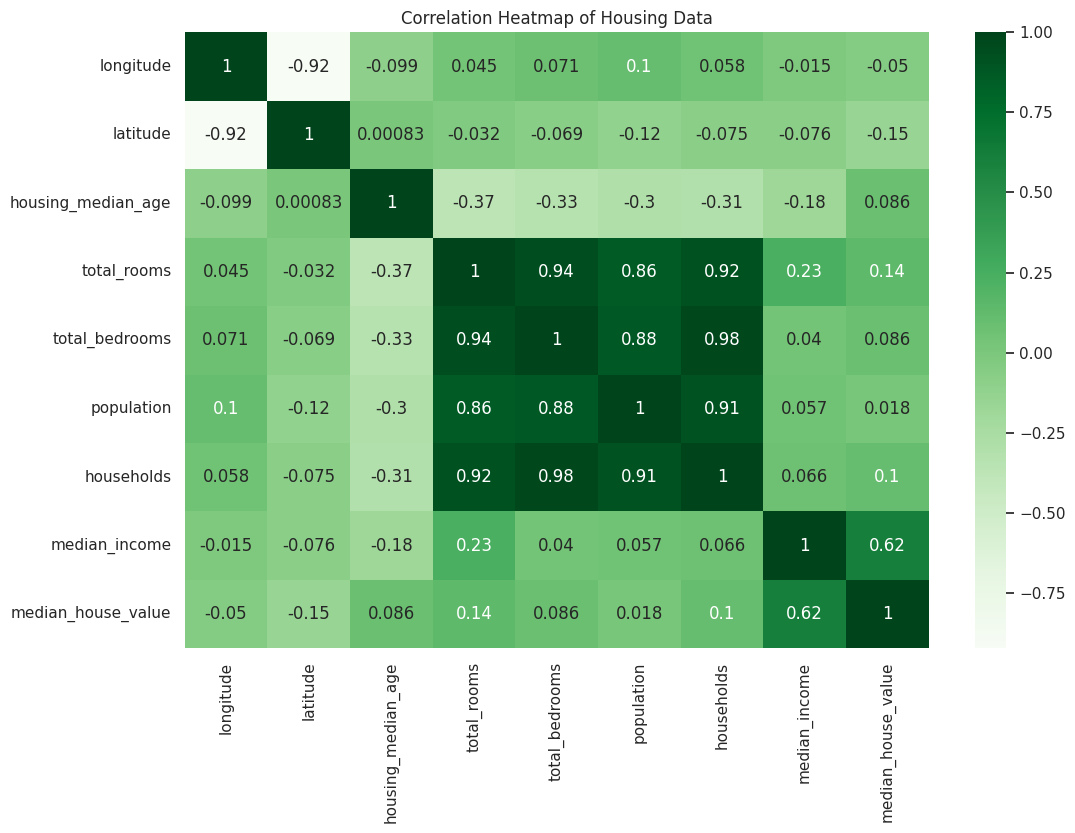

In [16]:
plt.figure(figsize=(12, 8))
sb.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='Greens')
# leaving ocean_proximity caz its not a number
plt.title('Correlation Heatmap of Housing Data')
plt.show()

In [17]:
data = data.drop("total_bedrooms", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

#String Data Categorization to Dummy Variables

In [18]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'],prefix='ocean_proximity').astype(int)
data = pd.concat([data.drop('ocean_proximity',axis=1),ocean_proximity_dummies],axis=1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [19]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [20]:
# wkt their should no perfect multi-colinearity
data=data.drop('ocean_proximity_ISLAND',axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

#Splitting into training n Testing

In [37]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = 'median_house_value'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4122)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (15220, 11)
X_test (3806, 11)
y_train (15220,)
y_test (3806,)


##train

In [38]:
X_train_const = sm.add_constant(X_train)
# X_train
X_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
19261,1.0,-122.74,38.44,23.0,2819.0,1644.0,546.0,2.6576,1,0,0,0
14348,1.0,-117.19,32.75,52.0,25.0,13.0,5.0,0.5360,0,0,0,1
1388,1.0,-122.11,37.98,11.0,4371.0,1790.0,660.0,6.1350,0,0,1,0
20403,1.0,-118.88,34.22,22.0,3654.0,1565.0,518.0,6.2748,1,0,0,0
19761,1.0,-122.17,40.11,24.0,1631.0,1042.0,333.0,1.7708,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2789,1.0,-118.42,37.36,18.0,2281.0,1425.0,465.0,1.7388,0,1,0,0
7652,1.0,-118.27,33.83,28.0,2152.0,1623.0,429.0,4.3500,1,0,0,0
10064,1.0,-121.03,39.37,15.0,1337.0,1172.0,306.0,2.6341,0,1,0,0
18302,1.0,-122.14,37.42,46.0,206.0,134.0,51.0,4.1500,0,0,1,0


In [39]:
model_fitted = sm.OLS(y_train,X_train_const).fit()
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     2000.
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        05:06:15   Log-Likelihood:            -1.8888e+05
No. Observations:               15220   AIC:                         3.778e+05
Df Residuals:                   15208   BIC:                         3.779e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##Predictions n testing


In [40]:

X_test_const = sm.add_constant(X_test)

test_prediction = model_fitted.predict(X_test_const)
test_prediction

,0
8334,222163.884866
1179,62991.802703
7694,244378.468117
16678,191856.044160
3914,192547.234197
...,...
3224,100404.297129
656,243735.602656
4685,229557.498754
18431,302340.888722


In [41]:
X_test_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8334,1.0,-118.31,33.94,44.0,1854.0,976.0,335.0,3.6583,1,0,0,0
1179,1.0,-121.54,39.48,29.0,2896.0,1809.0,617.0,1.8047,0,1,0,0
7694,1.0,-118.12,33.96,38.0,1301.0,877.0,275.0,4.6250,1,0,0,0
16678,1.0,-120.63,35.13,16.0,2680.0,975.0,619.0,1.7878,1,0,0,0
3914,1.0,-118.52,34.19,42.0,881.0,464.0,163.0,2.9511,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3224,1.0,-119.68,36.31,12.0,2739.0,1859.0,498.0,2.9936,0,1,0,0
656,1.0,-122.14,37.71,18.0,3905.0,2197.0,1044.0,3.6932,0,0,1,0
4685,1.0,-118.35,34.07,48.0,890.0,434.0,232.0,3.6111,1,0,0,0
18431,1.0,-121.85,37.26,16.0,1982.0,1030.0,297.0,6.4339,1,0,0,0


#Checking OLS assumption

Assumption 1 : Linearity

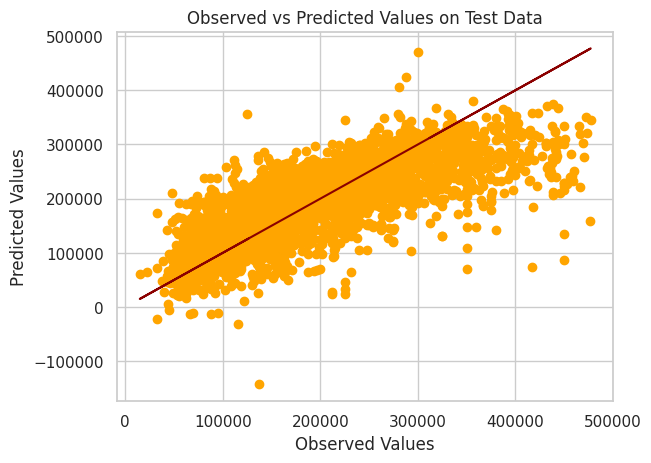

In [59]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_prediction, color = "orange")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()


Positive Linear Relationship: The red line (which represents a perfect prediction line) and the distribution of the data points suggest there's a positive linear relationship between the observed and predicted values. This means that as the actual values increase, the predicted values also increase, which is a good sign for linearity.

In [46]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is  {np.round(mean_residuals,2)}")

The mean of the residuals is  -0.0


While we cannot directly observe the true errors in the model, we can work with the residuals, which are the differences between the observed values and the predicted values from the model. If the model is well-fitted, the residuals should be randomly scattered around zero without any systematic patterns.

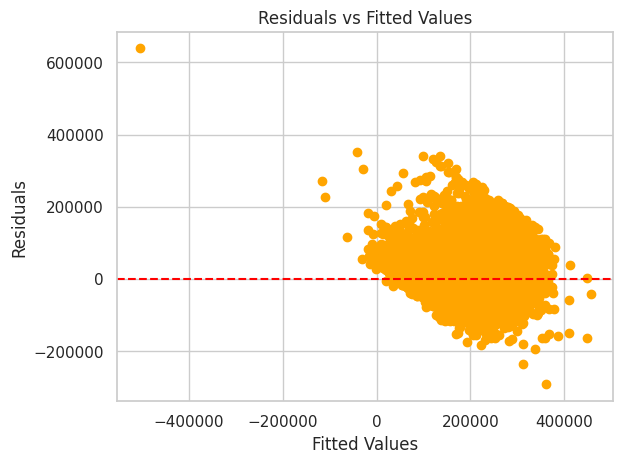

In [61]:
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "orange")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In this plot, we don't see any discernible patterns. The residuals are thus randomly distributed around the horizontal line at zero, with no clear shape or trend. If there's a pattern, or if the residuals show a systematic deviation from zero, it could suggest issues such as model misspecification, non-linearity, or omitted variable bias.

Assumtion 3: Exogeneity

In [66]:
#Calculate the residuals
residuals = model_fitted.resid
# Check for correlation between residuals and each predictor
for column in X_train.columns:
  corr_coefficient = np.corrcoef(X_train [column], residuals) [0, 1]
  print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')

Correlation between residuals and longitude: -0.0
Correlation between residuals and latitude: 0.0
Correlation between residuals and housing_median_age: 0.0
Correlation between residuals and total_rooms: -0.0
Correlation between residuals and population: -0.0
Correlation between residuals and households: -0.0
Correlation between residuals and median_income: -0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: 0.0
Correlation between residuals and ocean_proximity_INLAND: 0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: -0.0


The Durbin-Wu-Hausman (DWH) test is a statistical test used to detect endogeneity — specifically, whether your independent variables are exogenous or endogenous in a regression model.When you suspect that one (or more) of your independent variables is correlated with the error term — which violates the OLS assumption of exogeneity — the DWH test helps you confirm this.

Assumtion 4: Exogeneity


When the variance of the error term is not constant across levels of the independent variables (i.e., some parts of the model have more "spread" or "noise" than others), the data is said to be heteroskedastic.

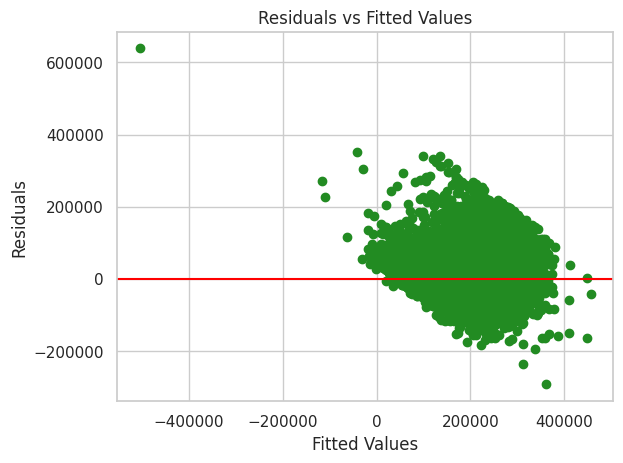

In [67]:
plt.scatter(model_fitted. fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

#Train/Test/Evaluation with Sklearn

##Scaling the Data

1.Scaling the Data (Standardization):

  You’re using StandardScaler to standardize (scale) the features (X_train and X_test).

  The training data (X_train) is used to fit the scaler, and then it's used to transform both the training and test data.

  This ensures the model sees the data in the same scale, avoiding bias in learning.

2.Linear Regression Model:

  You initialize a LinearRegression model from sklearn.linear_model.

  You fit the model on the scaled training data (X_train_scaled and y_train).

3.Prediction:

  After fitting the model, you predict the values for the scaled test data (X_test_scaled).

4.Model Evaluation (MSE & RMSE):

  MSE (Mean Squared Error): Measures the average squared difference between the predicted and actual values.

  RMSE (Root Mean Squared Error): The square root of MSE, which provides a more interpretable measure in the original units of the target variable.

5.Output:

  It prints out the RMSE for the test set, which tells you how well your model performs. A lower RMSE indicates better model performance.

In [68]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')

RMSE on Test Set: 57975.16507622947


In [70]:
print(y_pred)
y_test

[222163.88486581  62991.80270281 244378.46811699 ... 229557.49875438
 302340.88872179 307438.93434227]


,median_house_value
8334,126700.0
1179,53800.0
7694,191300.0
16678,55000.0
3914,203900.0
...,...
3224,60600.0
656,166800.0
4685,450000.0
18431,289200.0
